 **1. Importing and Installing Packages.**

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})


**Loading the row data**

In [ ]:
#loading the data
raw_data = pd.read_csv('/content/Survey1.csv')

#printing raw data
print(raw_data.shape)
raw_data.pop('Timestamp')

raw_data.head(5)



(341, 13)


,Student Name,College Name,Year_Branch,medium10th,medium12th/Diploma?,language understand in pdf?,need translation,Which texts too difficult,to study engg in Marathi,prefer for study of engg,studying Engineering in Marathi,studying Engineering in English
0,Vaishnavi Shantaram Nale,Vishwakarma Institute of Information technology,IT,Semi-English,English,English,No,English,No,English,4,2
1,Sejal Sawant,VIIT,TY_IT,Semi-English,English,English,No,Marathi,No,Marathi,4,2
2,Rutuja Makardhwaj Chavan,"VIIT, Pune",TY_IT,Semi-English,English,English,Yes,Marathi,No,English,1,4
3,Ayush,"VIIT, Pune",3rd_IT,English,English,English,Yes,Marathi,Yes,English,1,5
4,Tanvi Garg,VIIT,TY IT,English,English,English,No,English,No,English,4,1


 **2. Data Preprocessing **

Exploratory Data Analysis

In [ ]:
# 1. checking for null values
raw_data.isnull().sum()

Student Name                       0
College Name                       0
Year_Branch                        0
medium10th                         0
medium12th/Diploma?                0
 language understand in pdf?       0
need  translation                  0
Which texts too difficult          0
to study engg in Marathi           0
 prefer for study of engg          0
studying Engineering in Marathi    0
studying Engineering in English    0
dtype: int64

In [ ]:
 # Investigate all the elements whithin each Feature

for column in raw_data:
  unique_values = np.unique(raw_data[column])
  nr_values = len(unique_values)
  if(nr_values <= 10):
     print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
  else:
     print("The number of values for feature {} is: {}".format(column, nr_values))


The number of values for feature Student Name  is: 339
The number of values for feature College Name is: 172
The number of values for feature Year_Branch is: 275
The number of values for feature medium10th  is: 3 -- ['English' 'Marathi' 'Semi-English']
The number of values for feature medium12th/Diploma? is: 2 -- ['English' 'Marathi']
The number of values for feature  language understand in pdf? is: 2 -- ['English' 'Marathi']
The number of values for feature need  translation is: 2 -- ['No' 'Yes']
The number of values for feature Which texts too difficult  is: 2 -- ['English' 'Marathi']
The number of values for feature to study engg in Marathi is: 2 -- ['No' 'Yes']
The number of values for feature  prefer for study of engg is: 2 -- ['English' 'Marathi']
The number of values for feature studying Engineering in Marathi is: 5 -- [1 2 3 4 5]
The number of values for feature studying Engineering in English is: 5 -- [1 2 3 4 5]


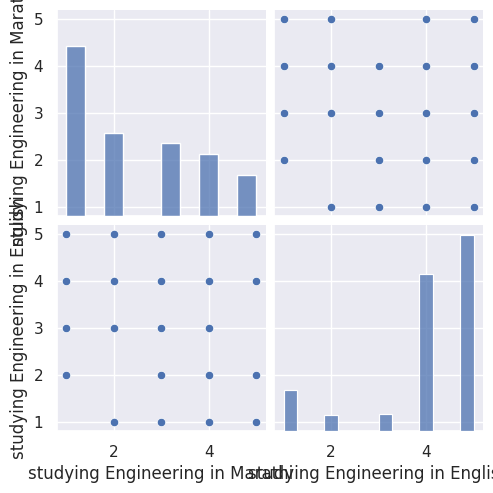

In [ ]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)


**Data Cleaing**

In [ ]:
# Deleting the outlier

raw_data = raw_data[raw_data['studying Engineering in Marathi'] < 6]

raw_data.shape

(341, 12)

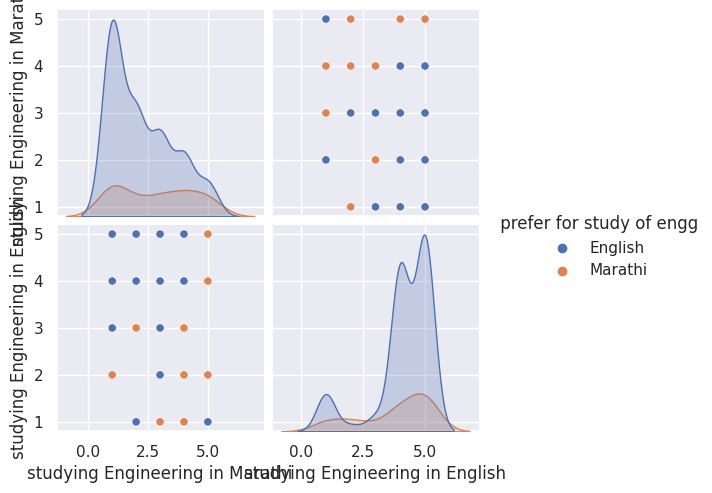

In [ ]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data, hue = ' prefer for study of engg')

In [ ]:
# Deleting the outlier

raw_data1 = raw_data[raw_data['studying Engineering in English'] < 3]

raw_data1.shape

(46, 12)

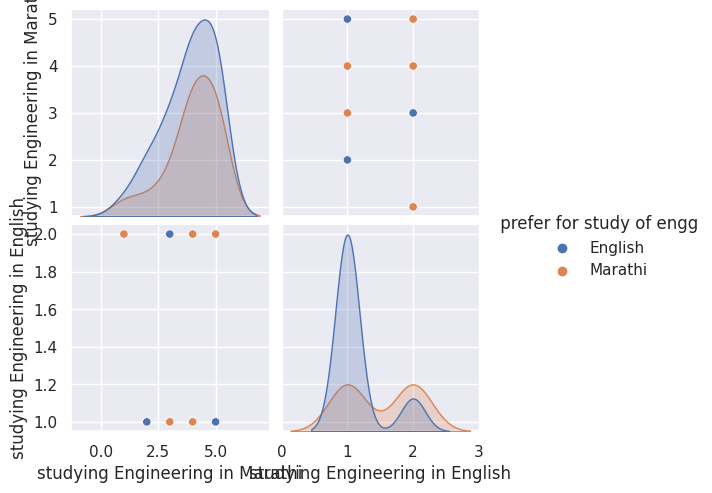

In [ ]:
g = sns.pairplot(raw_data1, hue = ' prefer for study of engg')

<Axes: xlabel=' prefer for study of engg', ylabel='count'>

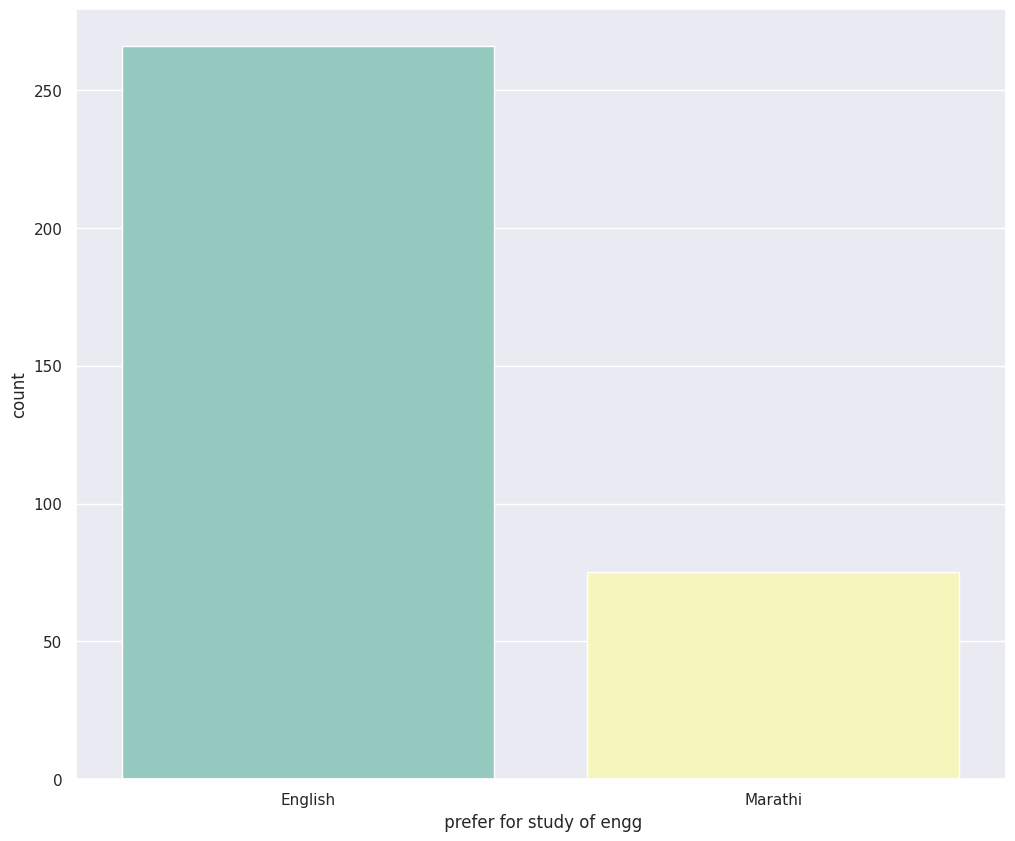

In [ ]:
# Investigating the distribution of y

sns.countplot(x = ' prefer for study of engg', data = raw_data, palette = 'Set3')

In [ ]:
raw_data.columns

Index(['Student Name ', 'College Name', 'Year_Branch', 'medium10th ',
       'medium12th/Diploma?', ' language understand in pdf?',
       'need  translation', 'Which texts too difficult ',
       'to study engg in Marathi', ' prefer for study of engg',
       'studying Engineering in Marathi', 'studying Engineering in English'],
      dtype='object')

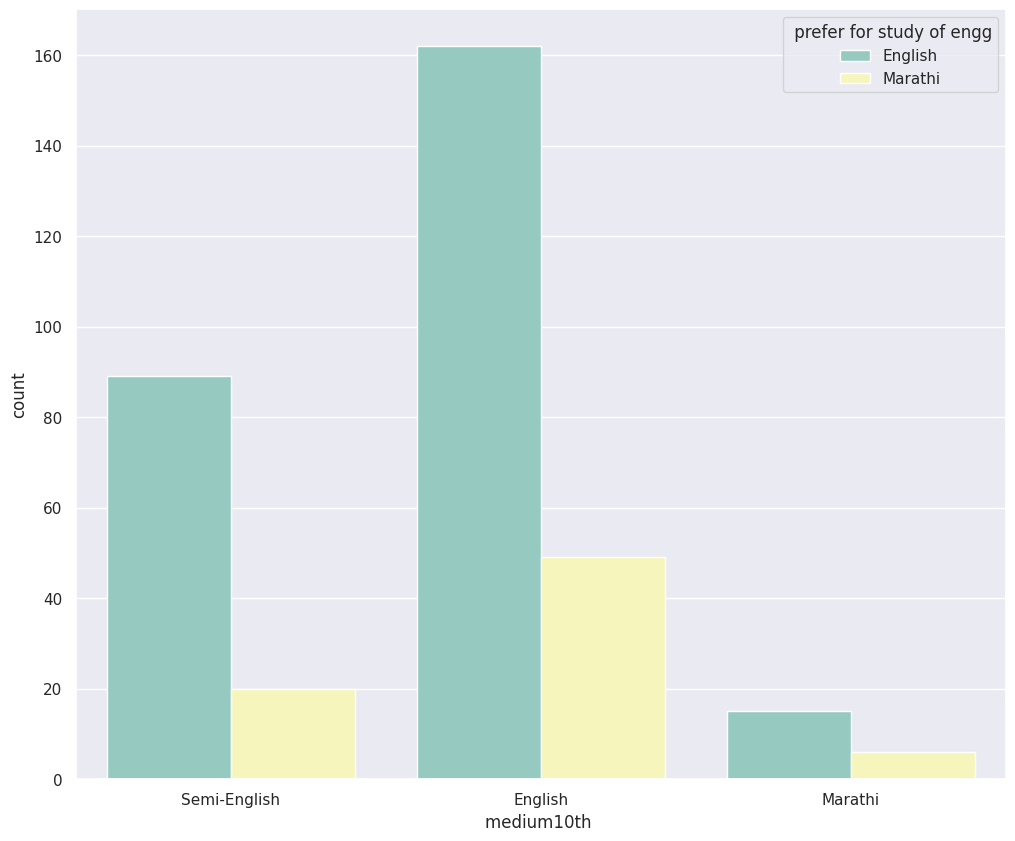

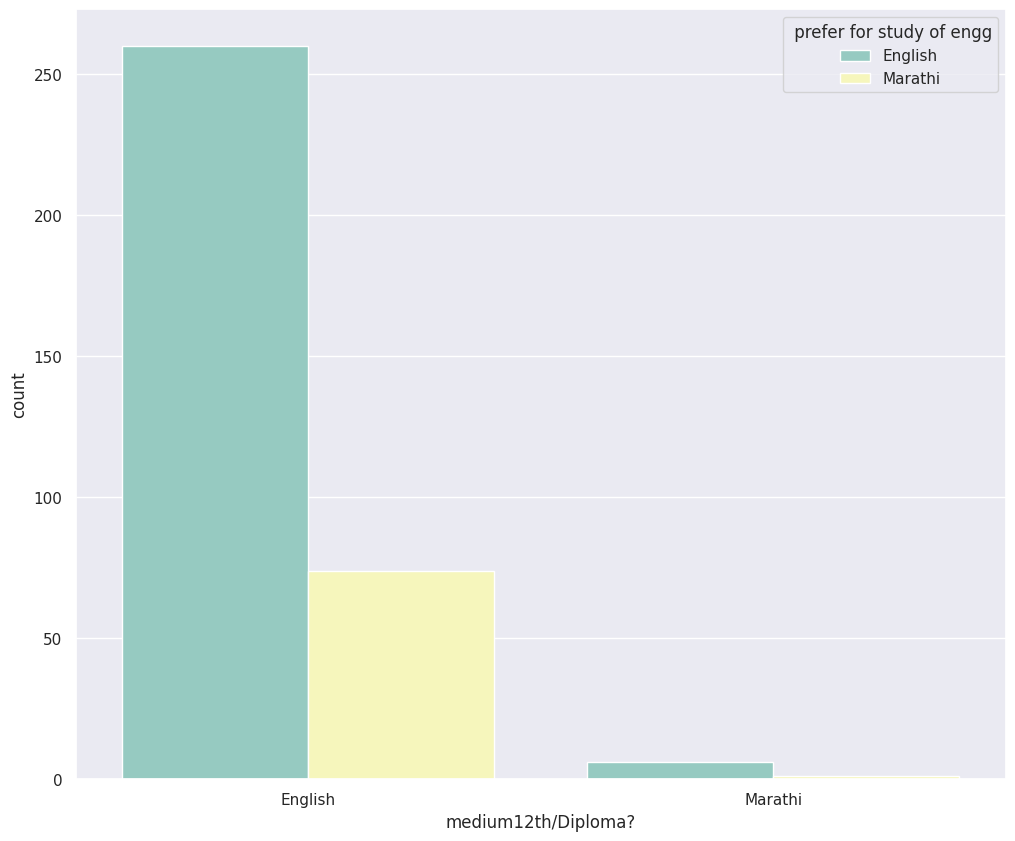

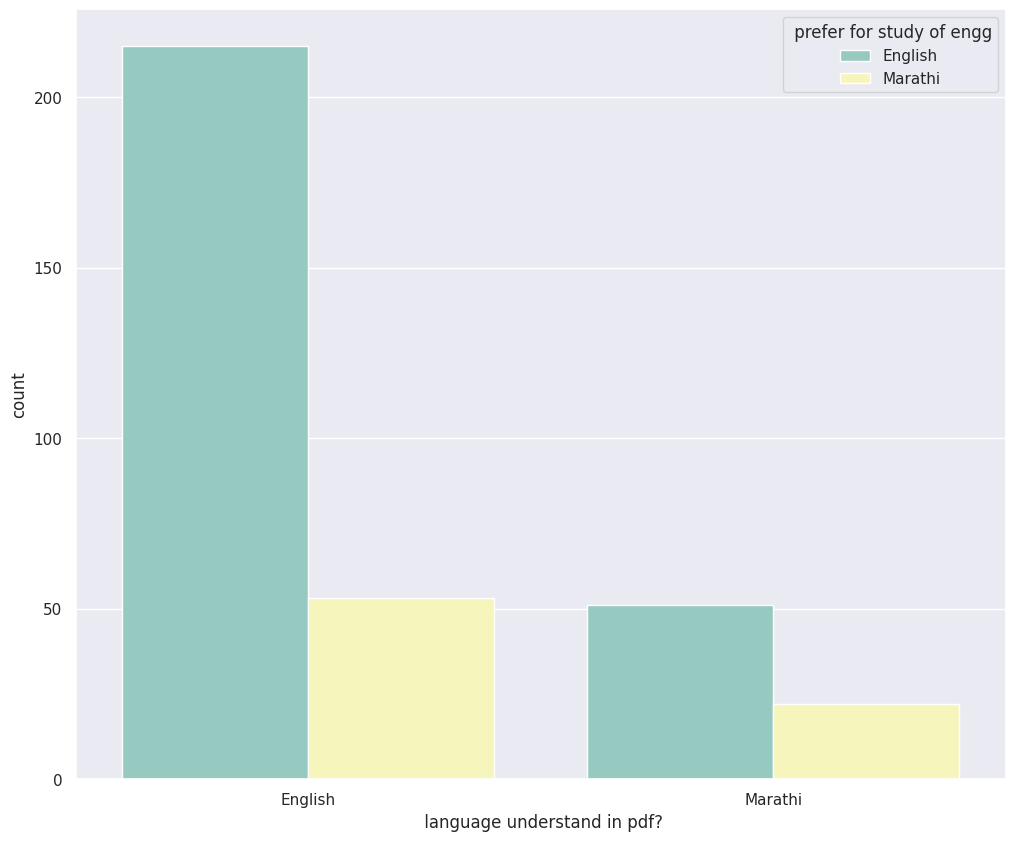

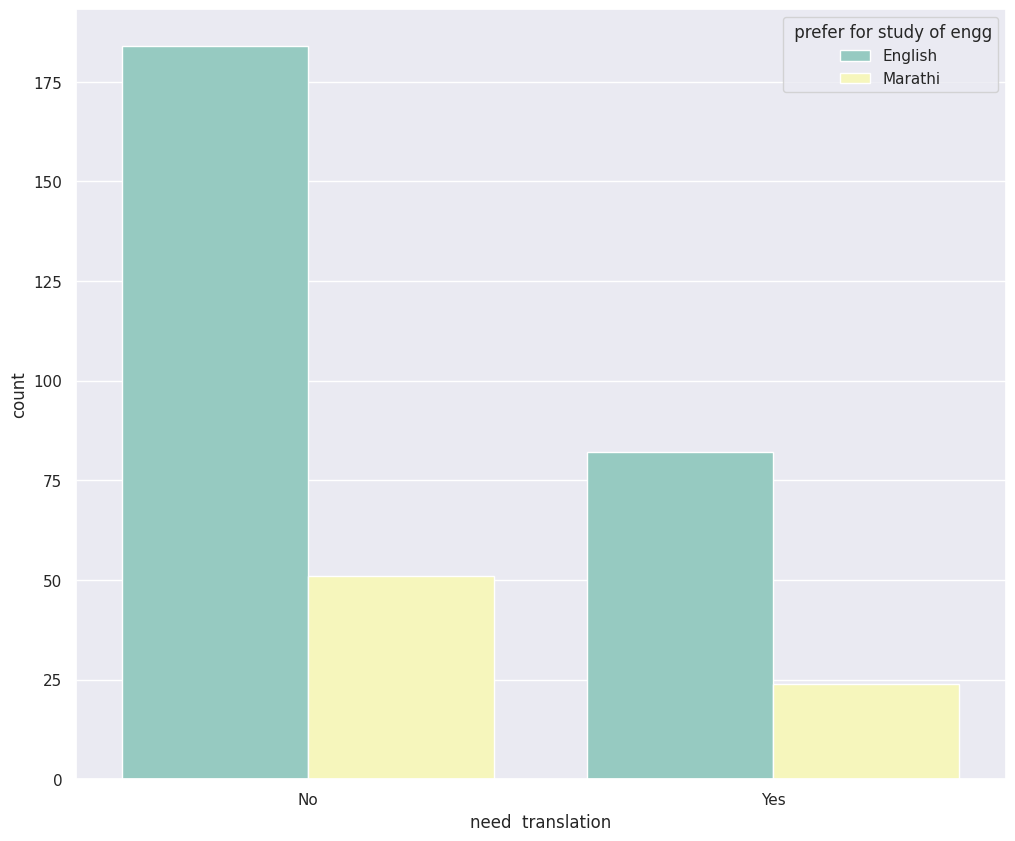

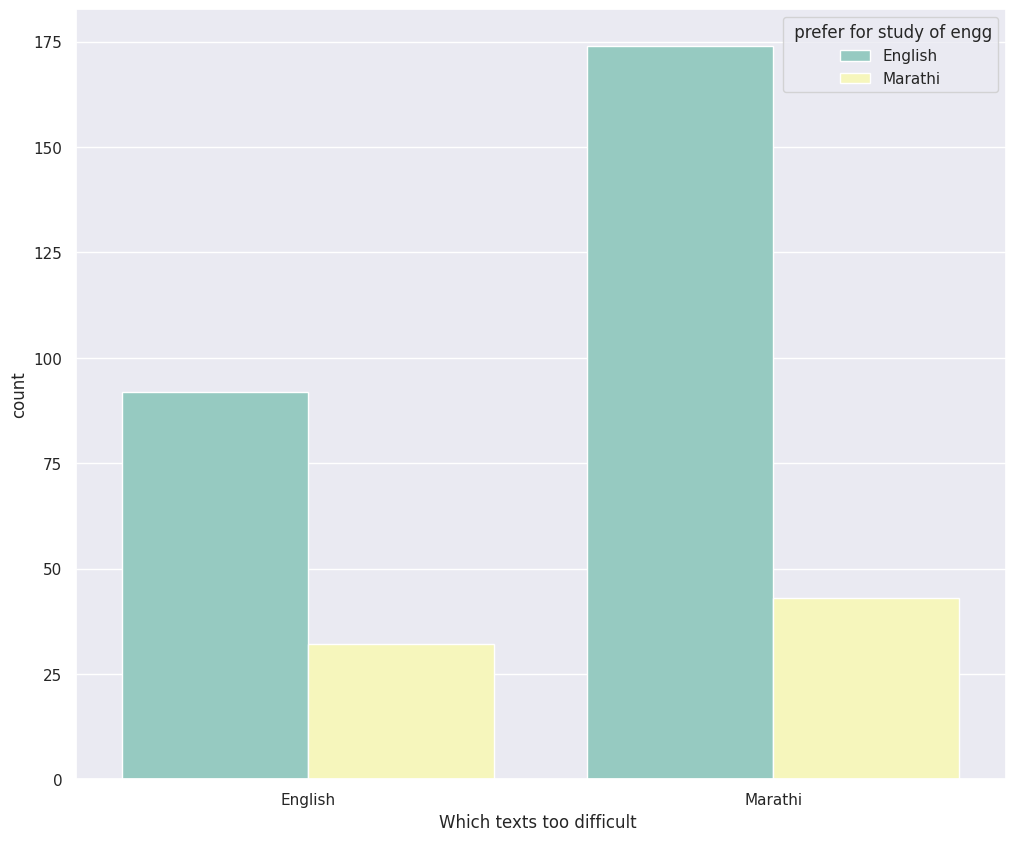

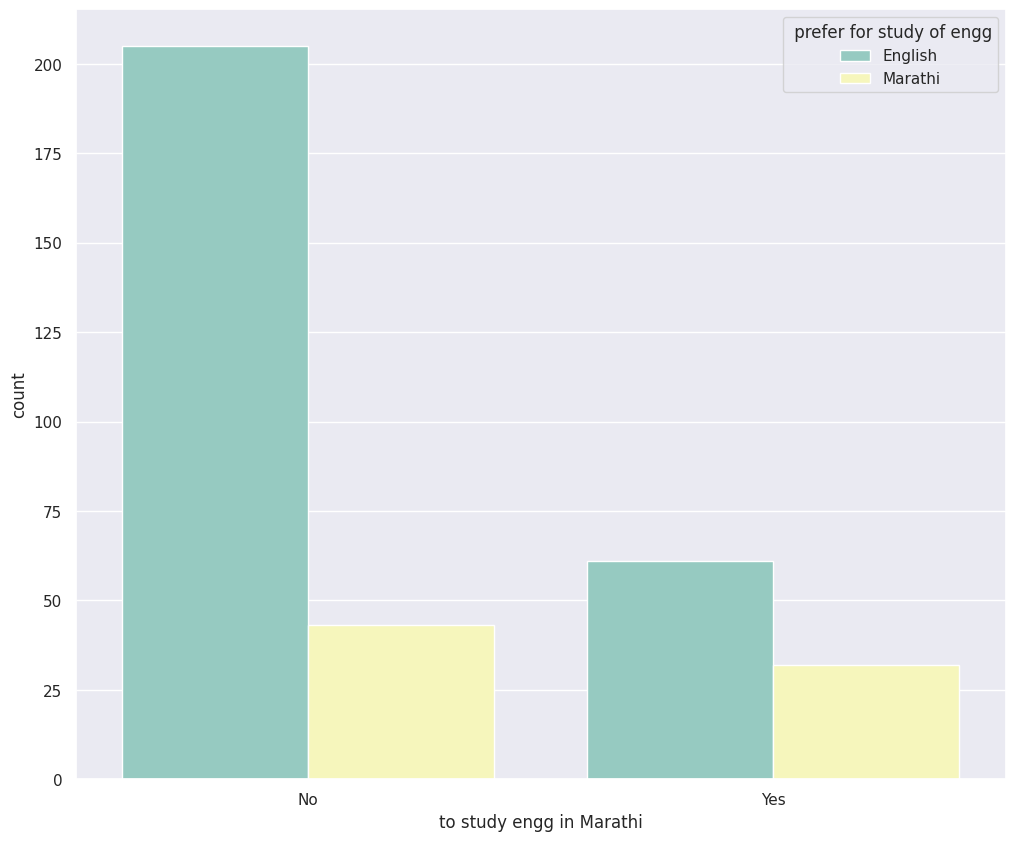

In [ ]:
# Looping through all the features by our y variable - see if there is relationship
# removing the numerical values

features = ['medium10th ', 'medium12th/Diploma?', ' language understand in pdf?',
       'need  translation', 'Which texts too difficult ',
       'to study engg in Marathi', ]

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = ' prefer for study of engg')
    plt.show()

In [ ]:
raw_data.head()
raw_data.pop('Student Name ')
raw_data.pop('College Name')
raw_data.pop('Year_Branch')
raw_data.head(5)

,medium10th,medium12th/Diploma?,language understand in pdf?,need translation,Which texts too difficult,to study engg in Marathi,prefer for study of engg,studying Engineering in Marathi,studying Engineering in English
0,Semi-English,English,English,No,English,No,English,4,2
1,Semi-English,English,English,No,Marathi,No,Marathi,4,2
2,Semi-English,English,English,Yes,Marathi,No,English,1,4
3,English,English,English,Yes,Marathi,Yes,English,1,5
4,English,English,English,No,English,No,English,4,1


In [ ]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = features)

print(raw_data.shape)
# print the shape
print(new_raw_data.shape)
#new_raw_data.reset_index(drop=True)
# Creating a new 0-1 y variable
#new_raw_data[['prefer for study engg']=='Marathi] = 0
new_raw_data[' prefer for study of engg'][new_raw_data[' prefer for study of engg'] == 'English'] = 1
new_raw_data[' prefer for study of engg'][new_raw_data[' prefer for study of engg'] == 'Marathi'] = 0

# Visualizing the data
new_raw_data

(341, 9)
(341, 16)


<ipython-input-15-99a9bf72264c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data[' prefer for study of engg'][new_raw_data[' prefer for study of engg'] == 'English'] = 1
<ipython-input-15-99a9bf72264c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data[' prefer for study of engg'][new_raw_data[' prefer for study of engg'] == 'Marathi'] = 0


,prefer for study of engg,studying Engineering in Marathi,studying Engineering in English,medium10th _English,medium10th _Marathi,medium10th _Semi-English,medium12th/Diploma?_English,medium12th/Diploma?_Marathi,language understand in pdf?_English,language understand in pdf?_Marathi,need translation_No,need translation_Yes,Which texts too difficult _English,Which texts too difficult _Marathi,to study engg in Marathi_No,to study engg in Marathi_Yes
0,1,4,2,0,0,1,1,0,1,0,1,0,1,0,1,0
1,0,4,2,0,0,1,1,0,1,0,1,0,0,1,1,0
2,1,1,4,0,0,1,1,0,1,0,0,1,0,1,1,0
3,1,1,5,1,0,0,1,0,1,0,0,1,0,1,0,1
4,1,4,1,1,0,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,1,1,5,1,0,0,1,0,1,0,1,0,0,1,1,0
337,0,1,5,1,0,0,1,0,1,0,1,0,1,0,1,0
338,1,1,5,1,0,0,1,0,1,0,1,0,0,1,1,0
339,0,3,1,1,0,0,1,0,0,1,0,1,0,1,1,0


**Feature Selection**

In [ ]:
# Split the data into X & y

X = new_raw_data.drop(' prefer for study of engg', axis = 1).values
y = new_raw_data[' prefer for study of engg']

y = y.astype(int)

print(X.shape)
print(y.shape)

(341, 15)
(341,)


In [ ]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop(' prefer for study of engg', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))

    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for studying Engineering in Marathi is : 0.2651305551365946
The feature importance for studying Engineering in English is : 0.17172784958161835
The feature importance for medium10th _English is : 0.05517738744031325
The feature importance for medium10th _Marathi is : 0.059606848424714906
The feature importance for medium10th _Semi-English is : 0.009090947863518144
The feature importance for medium12th/Diploma?_English is : 0.0
The feature importance for medium12th/Diploma?_Marathi is : 0.0
The feature importance for  language understand in pdf?_English is : 0.2037056017407775
The feature importance for  language understand in pdf?_Marathi is : 0.023289225879255065
The feature importance for need  translation_No is : 0.08470796026427482
The feature importance for need  translation_Yes is : 0.01659419102874237
The feature importance for Which texts too difficult _English is : 0.02746615661797807
The feature importance for Which texts too difficult _Marathi is : 0.0

In [ ]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df

# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:12]

fi_df


,index,Feature,Feature Importance
0,0,studying Engineering in Marathi,0.265131
1,7,language understand in pdf?_English,0.203706
2,1,studying Engineering in English,0.171728
3,9,need translation_No,0.084708
4,13,to study engg in Marathi_No,0.083503
5,3,medium10th _Marathi,0.059607
6,2,medium10th _English,0.055177
7,11,Which texts too difficult _English,0.027466
8,8,language understand in pdf?_Marathi,0.023289
9,10,need translation_Yes,0.016594


**Splitting the Raw data-Hold out Validatiion**


In [ ]:
# Print the shapes

print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_to_keep]

(341, 16)
(341, 12)


In [ ]:
new_raw_data.head()

,prefer for study of engg,studying Engineering in Marathi,studying Engineering in English,medium10th _English,medium10th _Marathi,medium10th _Semi-English,medium12th/Diploma?_English,medium12th/Diploma?_Marathi,language understand in pdf?_English,language understand in pdf?_Marathi,need translation_No,need translation_Yes,Which texts too difficult _English,Which texts too difficult _Marathi,to study engg in Marathi_No,to study engg in Marathi_Yes
0,1,4,2,0,0,1,1,0,1,0,1,0,1,0,1,0
1,0,4,2,0,0,1,1,0,1,0,1,0,0,1,1,0
2,1,1,4,0,0,1,1,0,1,0,0,1,0,1,1,0
3,1,1,5,1,0,0,1,0,1,0,0,1,0,1,0,1
4,1,4,1,1,0,0,1,0,1,0,1,0,1,0,1,0


In [ ]:
# Split the data into X & y

X = new_raw_data[columns_to_keep].values
X

y = new_raw_data[' prefer for study of engg']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(341, 12)
(341,)


In [ ]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(244, 12)
(69, 12)
(28, 12)
(244,)
(69,)
(28,)


**Running Logistic regression**

In [ ]:
# Training  model

log_reg = LogisticRegression(random_state=6, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=6)

In [ ]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_



array([[-0.177590, 0.178294, 0.021259, -0.163265, 0.440886, 0.059970,
        -0.189671, -0.258288, -0.177411, 0.164148, 0.130584, -0.339755]])

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, threshold = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'% logit_roc_auc)
#plt.plot([0,1], [0,1], 'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Preference in study Engg')
#plt.legend(loc = "lower right")
#plt.savefig('LOC_Roc')
#plt.show()


**Evaluating the model**

In [ ]:
# score- Returns the mean accuracy on the given test data and labels
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7868852459016393
The Testing Accuracy is:  0.7391304347826086
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.79      0.99      0.88       193

    accuracy                           0.79       244
   macro avg       0.40      0.50      0.44       244
weighted avg       0.62      0.79      0.70       244



In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

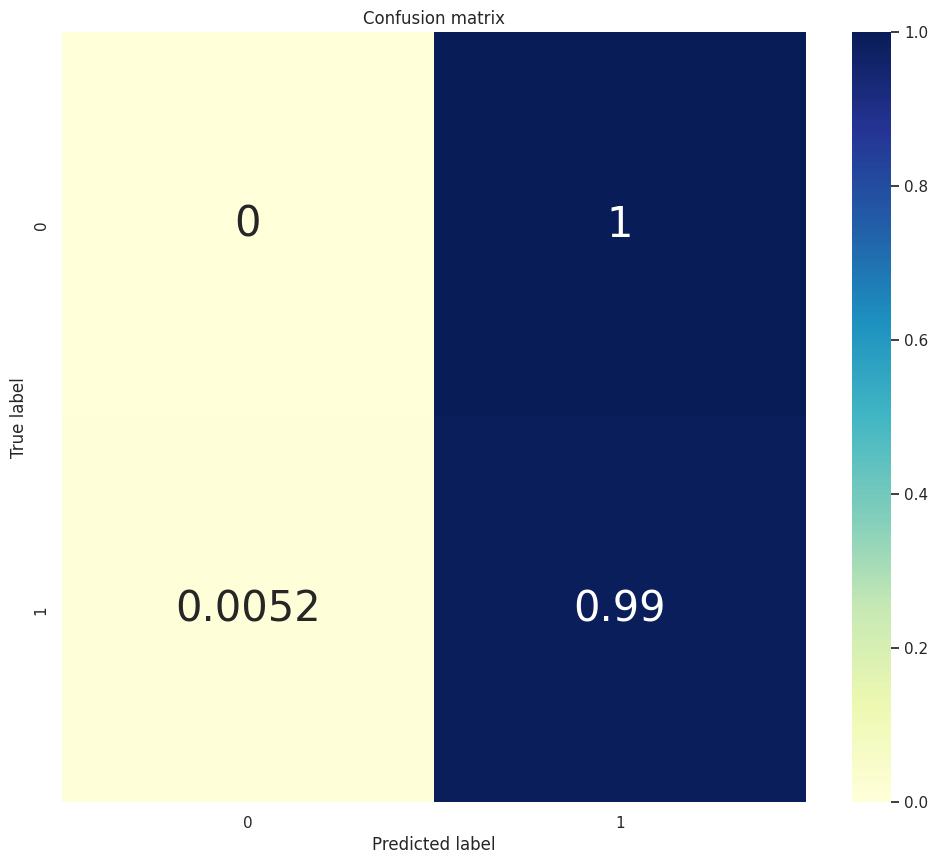

In [ ]:
# Visualizing confusion matrix

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
log_reg.classes_

array([0, 1])

In [ ]:
cm.sum(axis=1)
cm_norm

array([[0.000000, 1.000000],
       [0.005181, 0.994819]])

In [ ]:
cm.sum(axis=0)

array([  1, 243])

In [ ]:
np.diag(cm)

array([  0, 192])

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.000000 0.994819]
The Precision is: [0.000000 0.790123]
The False positive rate is: [0.005181 1.000000]
The False Negative Rate is:  [1.000000 0.005181]

The average TPR is: 0.49740932642487046
The average Precision is: 0.3950617283950617
The average False positive rate is: 0.5025906735751295
The average False Negative Rate is: 0.5025906735751295


In [ ]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.4938088010268542
The Log Loss on Testing Dataset is:  0.5457778282089493


**Hyper Parameter tunning**

In [ ]:
np.geomspace(1e-5, 1e5, num=20)

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
#plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
#plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

In [ ]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.7391304347826086
Log Loss: 9.402692188465345


In [ ]:
# Final Model

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.7857142857142857
Log Loss: 0.4109530286521595
